In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00001521_00002899.csv", sep=",")

In [156]:
df = df.drop("Jahr", axis=1)

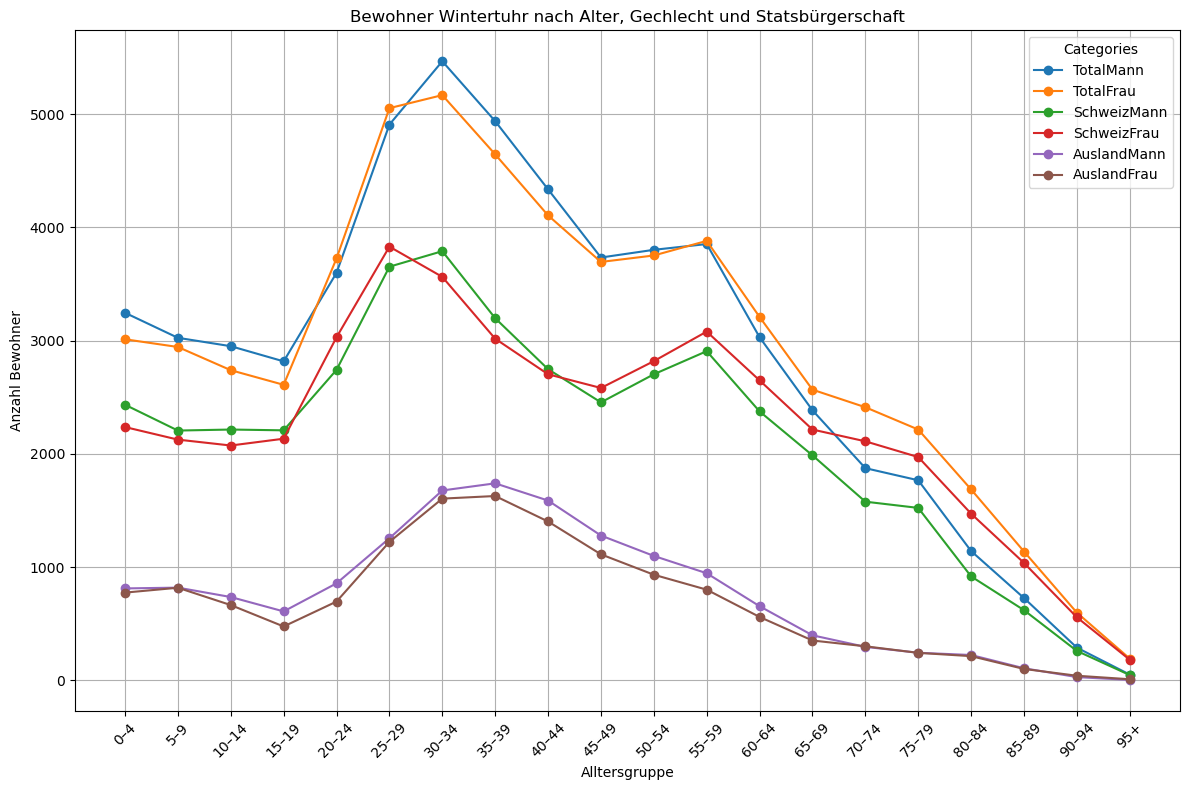

In [161]:
grouped_df = df.copy()
grouped_df['AK'] = pd.Categorical(df['AK'], categories=df['AK'], ordered=True)

grouped_df.set_index('AK', inplace=True)

plt.figure(figsize=(12, 8))
for column in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[column], marker='o', label=column)

plt.title('Bewohner Wintertuhr nach Alter, Gechlecht und Statsbürgerschaft')
plt.xlabel('Alltersgruppe')
plt.ylabel('Anzahl Bewohner')
plt.legend(title='Categories')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

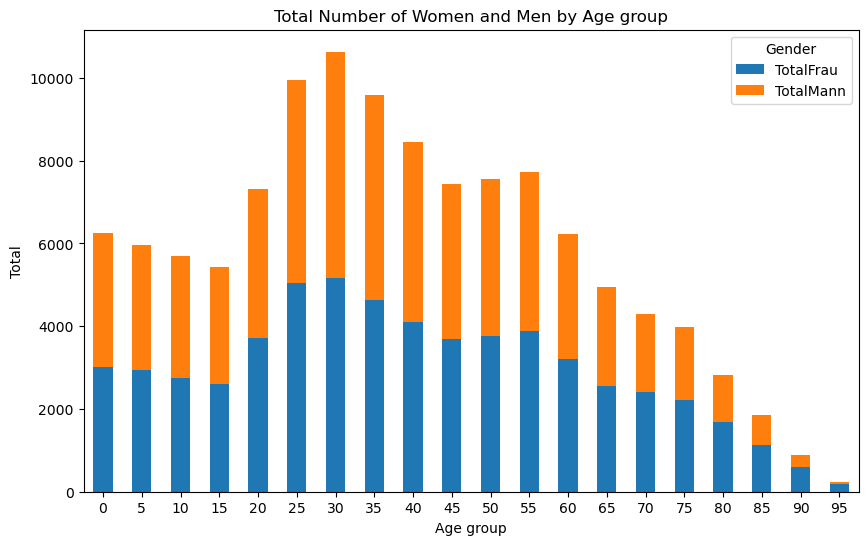

In [162]:
grouped_data = df.copy()
grouped_data['AK'] = df['AK'].str.split('–', n=1).str[0].str.strip("+")


grouped_data["AK"] = grouped_data["AK"].astype("int64")

grouped_data = grouped_data.groupby("AK").agg({
    'TotalFrau': 'sum',
    'TotalMann': 'sum'
})

grouped_data = grouped_data.sort_values(by="AK")
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Number of Women and Men by Age group')
plt.xlabel('Age group')
plt.ylabel('Total')
plt.xticks(rotation=0) 
plt.legend(title='Gender')
plt.show()


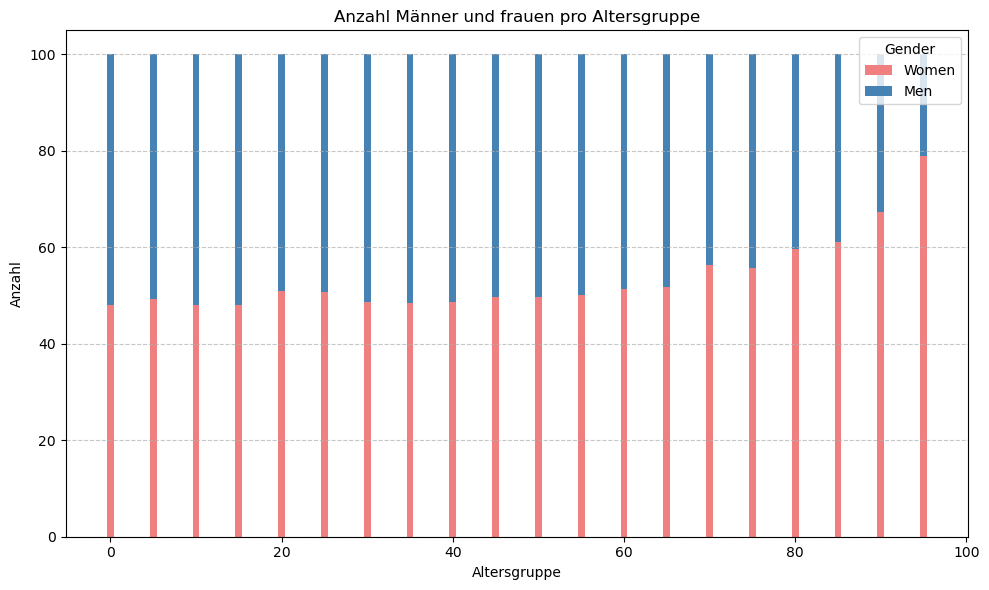

In [163]:
grouped_data = df.copy()
grouped_data['AK'] = grouped_data['AK'].str.split('–', n=1).str[0].str.strip("+")

grouped_data['AK'] = grouped_data['AK'].astype('int64')

grouped_data = grouped_data.groupby('AK').agg({
    'TotalFrau': 'sum',
    'TotalMann': 'sum'
})

grouped_data['Total'] = grouped_data['TotalFrau'] + grouped_data['TotalMann']
grouped_data['PercentFrau'] = (grouped_data['TotalFrau'] / grouped_data['Total']) * 100
grouped_data['PercentMann'] = (grouped_data['TotalMann'] / grouped_data['Total']) * 100

grouped_data = grouped_data.sort_values(by='AK')

plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentFrau'], label='Women', color='lightcoral')
plt.bar(grouped_data.index, grouped_data['PercentMann'], bottom=grouped_data['PercentFrau'], label='Men', color='steelblue')

plt.title('Anzahl Männer und frauen pro Altersgruppe')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()